In [4]:
# Melhor Reality Show de Competição

import requests
from bs4 import BeautifulSoup

planilha = []

links_filmes = ["https://www.imdb.com/title/tt0285335/?ref_=nv_sr_1?ref_=nv_sr_1",
                "https://www.imdb.com/title/tt1587934/?ref_=fn_al_tt_1",
                "https://www.imdb.com/title/tt6987788/?ref_=nv_sr_1?ref_=nv_sr_1",
                "https://www.imdb.com/title/tt1353056/?ref_=nv_sr_1?ref_=nv_sr_1",
                "https://www.imdb.com/title/tt0765425/?ref_=nv_sr_1?ref_=nv_sr_1",
                "https://www.imdb.com/title/tt1839337/?ref_=nv_sr_1?ref_=nv_sr_1"]

for link in links_filmes: # Pega cada link da lista de links para fazer a requisição
    requisicao = requests.get(link)

    sopa = BeautifulSoup(requisicao.content, "html.parser") # Dados brutos da página inteira
    
    # Conjunto que acha o nome do filme
    acha_nome_filme = sopa.find("div", {"class": "title_wrapper"}) # Div com o nome do episódio
    nome_filme_sujo = acha_nome_filme.find("h1", {"class": ""}).text.strip() # Limpa só o nome do episódio
    
    lista = nome_filme_sujo.split("(")
    nome_filme = lista[0]
    nome_filme = nome_filme.strip()
                            
    # Conjunto que acha a avaliação do filme
    avaliacao = sopa.find("div", {"class": "imdbRating"})
    nota = avaliacao.find("span", {"itemprop": "ratingValue"}).text.strip()
    votos = avaliacao.find("span", {"class": "small", "itemprop": "ratingCount"}).text.strip()
    votos = votos.replace(",", "") # Limpa para poder converter para inteiro
    
    dicionario = {"filme": nome_filme, "nota": float(nota), "votos": int(votos)} # Monta o dicionário
    planilha.append(dicionario) # Adiciona planilha ao dicionário
    
print(planilha)

[{'filme': 'The Amazing Race', 'nota': 7.6, 'votos': 12857}, {'filme': 'American Ninja Warrior', 'nota': 6.9, 'votos': 2774}, {'filme': 'Mandou Bem', 'nota': 7.4, 'votos': 2809}, {'filme': 'RuPaul e a Corrida das Loucas', 'nota': 8.5, 'votos': 11587}, {'filme': 'Top Chef', 'nota': 7.6, 'votos': 5064}, {'filme': 'The Voice', 'nota': 6.5, 'votos': 11028}]


In [5]:
import pandas

df = pandas.DataFrame(planilha)
df.to_csv("reality-show-competicao.csv", sep = ";", encoding = "utf-8")
df.sort_values(by = "nota", ascending = False)

,filme,nota,votos
3,RuPaul e a Corrida das Loucas,8.5,11587
0,The Amazing Race,7.6,12857
4,Top Chef,7.6,5064
2,Mandou Bem,7.4,2809
1,American Ninja Warrior,6.9,2774
5,The Voice,6.5,11028


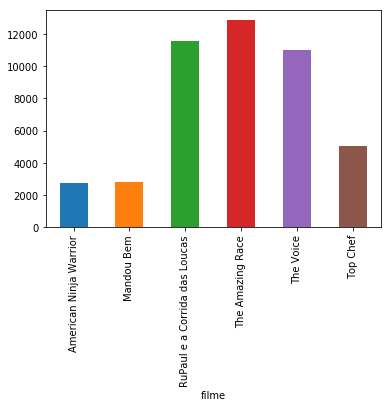

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

agrupamento1 = df.groupby("filme")["votos"].sum()
agrupamento1.plot.bar()

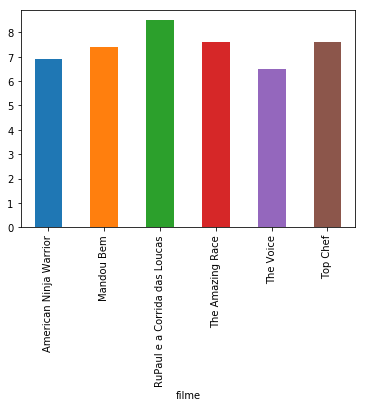

In [7]:
agrupamento2 = df.groupby("filme")["nota"].mean()
agrupamento2.plot.bar()